# Multiple Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 1. Introduction to Multiple Linear Regression

In [2]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
df = pd.DataFrame(streeteasy)
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [3]:
x = df[['size_sqft','building_age_yrs']]
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

ols = LinearRegression()
ols.fit(x_train, y_train)

LinearRegression()

c:\Users\larsk\.virtualenvs\Codecademy-XphA9WxU\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


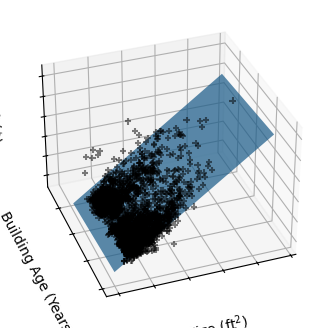

In [4]:
fig = plt.figure(1, figsize=(6, 4))

elev = 33.5
azim = -110

ax = Axes3D(fig, elev=elev, azim=azim)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[['size_sqft']], x_train[['building_age_yrs']], y_train, c='k', marker='+', alpha=.5)
ax.plot_surface(np.array([[0, 0], [4500, 4500]]), np.array([[0, 140], [0, 140]]), ols.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), alpha=.7)
ax.set_xlabel('Size (ft$^2$)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')
ax.view_init(elev=elev, azim=azim)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

## 2. StreetEasy Dataset

- [StreetEasy](https://streeteasy.com/) is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.
- In this lesson, you will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.
- It has the following columns:
    - `rental_id`: rental ID
    - `rent`: price of rent in dollars
    - `bedrooms`: number of bedrooms
    - `bathrooms`: number of bathrooms
    - `size_sqft`: size in square feet
    - `min_to_subway`: distance from subway station in minutes
    - `floor`: floor number
    - `building_age_yrs`: building's age in years
    - `no_fee`: fee indicator (0 for fee, 1 for no fee)
    - `has_roofdeck`: roof deck indicator (0 for no, 1 for yes)
    - `has_washer_dryer`: washer/dryer indicator (0 for no, 1 for yes)
    - `has_doorman`: doorman indicator (0 for no, 1 for yes)
    - `has_elevator`: elevator indicator (0 for no, 1 for yes)
    - `has_dishwasher`: dishwasher indicator (0 for no, 1 for yes)
    - `has_patio`: patio indicator (0 for no, 1 for yes)
    - `has_gym`: gym indicator (0 for no, 1 for yes)
    - `neighborhood`: neighborhood
    - `borough`: borough (Manhattan, Brooklyn, Queens)
- More information about this dataset can be found in the StreetEasy Dataset article.
- Let’s start by doing exploratory data analysis to understand the dataset better. We have broken the dataset for you into:
    - [manhattan.csv](https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv)
    - [brooklyn.csv](https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/brooklyn.csv)
    - [queens.csv](https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv)

**Task 1**  
- First, pick a borough out of the three (`Manhattan`, `Brooklyn`, and `Queens`) that you are most interested in!
- We are going to import the dataset and store it in a variable called `df`.
- To import, we will need to run this snippet:
    ```python
    pd.read_csv("path")
    ```
- Replace `path` with one of the three URL’s above.

<br>

**Task 2**  
- Let’s take a look at the first few rows using `df.head()`:
    - How far is the apartment in the third row from a subway station?
    -  Which neighborhood is it in?

In [5]:
# Task 1
df = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

# Task 2
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## 3. Training Set vs. Test Set

**Task 1**  
- Import `train_test_split` from `sklearn.model_selection`.

<br>

**Task 2**  
- Create a DataFrame x that selects the following columns from the main df DataFrame:
    - '`bedrooms`'
    - '`bathrooms`'
    - '`size_sqft`'
    - '`min_to_subway`'
    - '`floor`'
    - '`building_age_yrs`'
    - '`no_fee`'
    - '`has_roofdeck`'
    - '`has_washer_dryer`'
    - '`has_doorman`'
    - '`has_elevator`'
    - '`has_dishwasher`'
    - '`has_patio`'
    - '`has_gym`'
- Create a DataFrame `y` that selects the `rent` column from the main `df` DataFrame.
- These are the columns we want to use for our regression model.

<br>

**Task 3**  
- Use scikit-learn’s `train_test_split()` method to split `x` into 80% training set and 20% testing set and generate:
    - `x_train`
    - `x_test`
    - `y_train`
    - `y_test`
- Set the `random_state` to `6`.

<br>

**Task 4**  
- Let’s take a look at the shapes of `x_train`, `x_test`, `y_train`, and `y_test` to see we got the proportion we wanted.
- We have 14 features that we’re looking for for each apartment, and 1 label we’re looking for for each apartment.

In [6]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

In [7]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2831, 14), (708, 14), (2831, 1), (708, 1))

## Multiple Linear Regression: Scikit-Learn

**Task 1**  
- Import `LinearRegression` from scikit-learn’s `linear_model` module.

<br>

**Task 2**  
- Create a Linear Regression model and call it `mlr`.
- Fit the model using `x_train` and `y_train`.

<br>

**Task 3**  
- Use the model to predict y-values from `x_test`. Store the predictions in a variable called `y_predict`.
- Now we have:
    - `x_test`
    - `x_train`
    - `y_test`
    - `y_train`
    - and `y_predict`!

<br>

**Task 4**  
- To see this model in action, let’s test it on [Sonny’s apartment](https://streeteasy.com/rental/2177438?utm_campaign=rental_listing&utm_medium=share&utm_source=web&lstt=EDzZOXT6O5pM72MZv6hKSSWVYvagJczSxaeUW3BJFXgI4lYFmbtfnax4B2EPiOVgtyReLr5EOhgUyQ0F) in Greenpoint, Brooklyn!
- Or if you reside in New York, plug in your own apartment’s values and see if you are over or underpaying!

In [10]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
df = pd.DataFrame(streeteasy)
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [11]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [12]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [13]:
y_predict = mlr.predict(x_test)

In [17]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)
predict

c:\Users\larsk\.virtualenvs\Codecademy-XphA9WxU\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2393.58059075]])

## 5. Visualizing Results with Matplotlib

**Task 1**  
- Create a 2D scatter plot using `y_test` and `y_predict`.
- The x-axis should represent actual rent prices and the y-axis should represent predicted rent prices.

<br>

**Task 2**  
- Add appropriate x-axis labels and y-axis labels, as well as a title.

<br>

**Task 3**  
- Show the plot using `plt.show()`.

In [18]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model=lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)

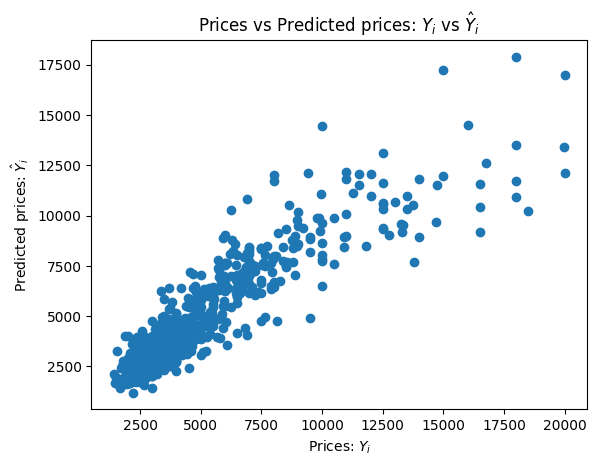

In [19]:
plt.scatter(y_test, y_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## 6. Multiple Linear Regression Equation

**Task 1**  
- Print out the coefficients using `.coef_`

In [20]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()

model=mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

In [21]:
mlr.coef_

array([[-302.73009383, 1199.3859951 ,    4.79976742,  -24.28993151,
          24.19824177,   -7.58272473, -140.90664773,   48.85017415,
         191.4257324 , -151.11453388,   89.408889  ,  -57.89714551,
         -19.31948556,  -38.92369828]])

## 7. Conclusion

**Task 1**  
- Create a scatterplot of `size_sqft` and `rent`:
    ```python
    plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
    ```
- Is there a strong correlation?

<br>

**Task 2**  
- Create a scatterplot of `min_to_subway` and `rent`:
    ```python
    plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
    ```
- Is there a strong correlation?

<br>

**Task 3**  
- Do the same for a few others and write down the ones that don’t have strong correlations.

In [22]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

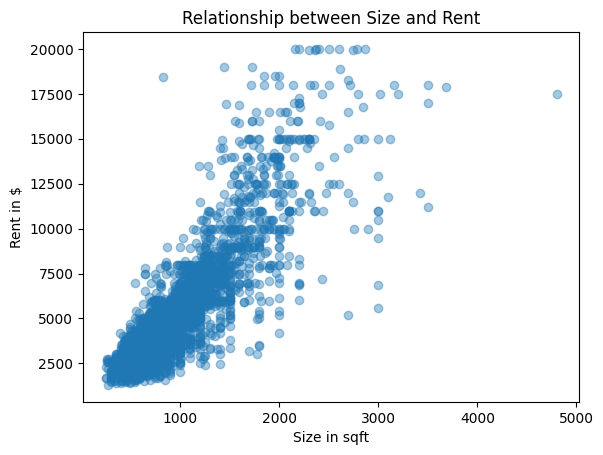

In [23]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.xlabel("Size in sqft")
plt.ylabel("Rent in $")
plt.title("Relationship between Size and Rent")
plt.show()

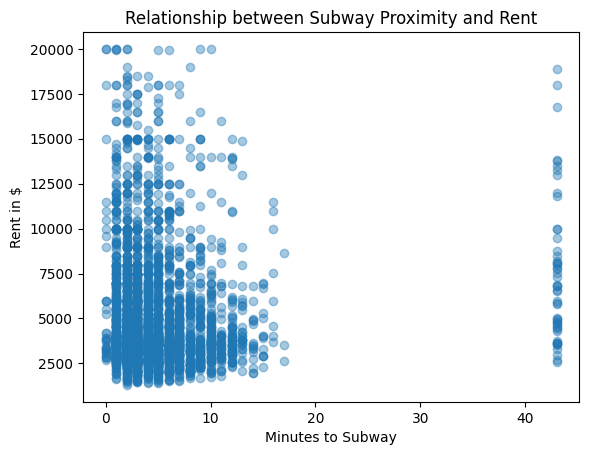

In [24]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.xlabel("Minutes to Subway")
plt.ylabel("Rent in $")
plt.title("Relationship between Subway Proximity and Rent")
plt.show()

## 8. Evaluating the Model's Accuracy

**Task 1**  
- Use the .`score()` method from `LinearRegression` to find the coefficient of determination (R²) for the **training set**.
- Write that number down.

<br>

**Task 2**  
- Use the `.score()` method from `LinearRegression` to find the coefficient of determination (R²) for the **testing set**.
- Write that number down.

In [25]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

mlr = LinearRegression()

model=mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

In [27]:
print("Train score:")
print(mlr.score(x_train, y_train), end="\n\n")

print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.7725460559817883

Test score:
0.8050371975357623


## 9. Rebuild the Model

- Now let’s rebuild the model using the new features as well as evaluate the new model to see if we improved!
- For `Manhattan`, the scores returned:
    ```py
    Train score: 0.772546055982
    Test score:  0.805037197536
    ```
- For `Brooklyn`, the scores returned:
    ```py
    Train score: 0.613221453798
    Test score:  0.584349923873
    ```
- For `Queens`, the scores returned:
    ```py
    Train score: 0.665836031009
    Test score:  0.665170319781
    ```
- For whichever borough you used, let’s see if we can improve these scores!

**Task 1**  
- Print the coefficients again to see which ones are strongest.

<br>

**Task 2**  
- Currently the `x` should look something like:
    ```py
    x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
    ```
- Remove some of the features that don’t have strong correlations and see if your scores improved!

Train score:
0.7725460559817883
Test score:
0.8050371975357623


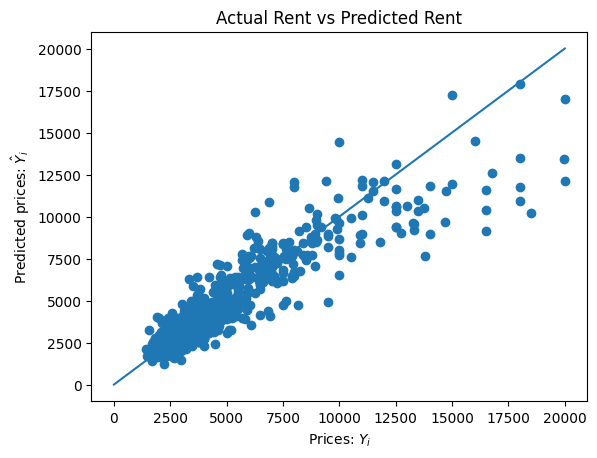

In [28]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()